In [1]:
import pandas as pd
police_killings = pd.read_csv("police_killings.csv", encoding="ISO_8859_1")

In [2]:
police_killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367,54766,0.937936,3,3,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972,40930,0.683411,2,1,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365,54930,0.825869,2,3,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295,55909,0.863814,3,3,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785,49669,1.384868,5,4,1.9,0.063550,0.403954


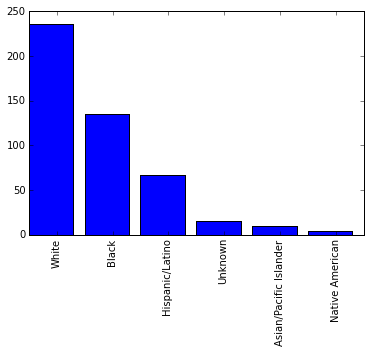

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

race_counts = police_killings["raceethnicity"].value_counts()
plt.bar(range(len(race_counts)), race_counts)
xtickloc = np.array(range(len(race_counts)))+0.5
plt.xticks(xtickloc, race_counts.index, rotation=90)
plt.show()

At first glance, whites make up the majority of police killings, however, upon further inspection, the proportion of whites in the population implies that minorities are being the victims of police shootings at significantly higher rates.

In [4]:
filt = police_killings[police_killings["p_income"] != '-']

In [5]:
income = filt["p_income"]

In [6]:
income = income.astype(int)

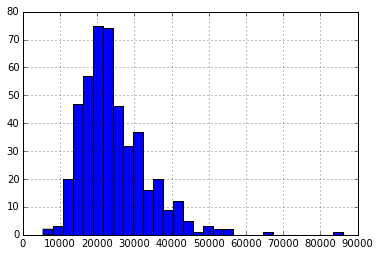

In [7]:
income.hist(bins=30)

In [34]:
state_pop = pd.read_csv("state_population.csv")

In [40]:
counts = police_killings["state_fp"].value_counts()

In [36]:
states = pd.DataFrame({"STATE": counts.index, "shootings": counts})

In [37]:
states = state_pop.merge(states, on="STATE")

In [86]:
states["pop_millions"] = states["POPESTIMATE2015"] / 1000000
states["rate"] = states["shootings"] / states["pop_millions"]
df = states.sort("shootings")
pk_10lowest = df[:10]
pk_10highest = df[-10:]


states['state_fp'] = states.STATE

pk = police_killings[police_killings["share_white"] != '-']
pk = pk[pk["share_black"] != '-']
pk = pk[pk["share_hispanic"] != '-']

share_cols = ['share_white', 'share_black', 'share_hispanic']
pk[share_cols] = pk[share_cols].astype(float)

pk[['state', 'share_white', 'share_black', 'share_hispanic']]

new_pk = states.merge(pk, on="state_fp")

pk.head()


,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,namelsad,lawenforcementagency,cause,armed,pop,share_white,share_black,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,32.529577,-86.362829,1,51,30902,1051030902,1051,Census Tract 309.02,Millbrook Police Department,Gunshot,No,3779,60.5,30.5,5.6,28375,51367,54766,0.937936,3,3,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,31.321739,-92.434860,22,79,11700,22079011700,22079,Census Tract 117,Rapides Parish Sheriff's Office,Gunshot,No,2769,53.8,36.2,0.5,14678,27972,40930,0.683411,2,1,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,42.583560,-87.835710,55,59,1200,55059001200,55059,Census Tract 12,Kenosha Police Department,Gunshot,No,4079,73.8,7.7,16.8,25286,45365,54930,0.825869,2,3,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,33.939298,-118.219463,6,37,535607,6037535607,6037,Census Tract 5356.07,South Gate Police Department,Gunshot,Firearm,4343,1.2,0.6,98.8,17194,48295,55909,0.863814,3,3,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,41.148575,-81.429878,39,153,530800,39153530800,39153,Census Tract 5308,Kent Police Department,Gunshot,No,6809,92.5,1.4,1.7,33954,68785,49669,1.384868,5,4,1.9,0.063550,0.403954


In [88]:
lowest = list(pk_10lowest.STATE)
highest = list(pk_10highest.STATE)

new_pk_low = new_pk[new_pk.state_fp.isin(lowest)]
new_pk_high = new_pk[new_pk.state_fp.isin(highest)]

In [93]:
pd.set_option("display.max_columns", None)

cols = ['pop', 'county_income', 'share_white', 'share_black', 'share_hispanic']
print(new_pk_low[cols].describe())
print(new_pk_high[cols].describe())


                pop  county_income  share_white  share_black  share_hispanic
count     15.000000      15.000000    15.000000    15.000000       15.000000
mean    5031.866667   58328.000000    72.173333     9.306667        7.073333
std     2991.855895   15623.922825    23.165259    12.323929        8.074428
min     2619.000000   31163.000000    25.500000     0.100000        0.000000
25%     3246.500000   46917.500000    55.500000     1.250000        2.500000
50%     4066.000000   59018.000000    75.400000     3.700000        5.200000
75%     5127.000000   71589.000000    94.200000    12.650000        9.500000
max    13561.000000   79488.000000    99.600000    45.600000       32.200000
                pop  county_income  share_white  share_black  share_hispanic
count    260.000000     260.000000   260.000000   260.000000      260.000000
mean    5048.934615   53632.969231    45.030000    13.189615       32.118077
std     2582.080474   12697.837635    28.042125    19.545498       26.853527

In [94]:
dummy_low = {}
dummy_high = {}
for column in cols:
    dummy_low[column] = new_pk_low[column].mean()
    dummy_high[column] = new_pk_high[column].mean()
    

In [96]:
print(dummy_low, dummy_high)

{'share_hispanic': 7.0733333333333333, 'share_black': 9.3066666666666666, 'pop': 5031.8666666666668, 'county_income': 58328.0, 'share_white': 72.173333333333346} {'share_hispanic': 32.11807692307692, 'share_black': 13.189615384615385, 'pop': 5048.9346153846154, 'county_income': 53632.969230769231, 'share_white': 45.029999999999994}
